In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import numpy as np
import regex as reg

%matplotlib inline  

Extracting references from texts:

In [2]:
!python ./Scripts/reference_extraction.py 

	Number of pdf documents :  503
	Number of documents for which we have an extracted reference section:  503
	Percentage of unparsed references: 0.001
	Number of unparsed references:  11
	Number of properly parsed references:  7378
	Saved reference list to: data/ as References.csv
	Saved to individual authors list: data/ as Reference_authors.csv


Loading references as previously extracted:

In [3]:
references = pd.read_csv('data/References.csv', index_col=0)

references.head()

,ref,file,ref_parsed,pub_year,year,identifier
0,"Black, P., & Wiliam, D. (2009). Developing the...",2018_import_480,"Black, P., & Wiliam, D. (2009)",2018,2009.0,"Black, P., & Wiliam, D. (2009). Developing the..."
1,"Borko, H., Mayfield, V., Marion, S., Flexer, R...",2018_import_480,"Borko, H., Mayfield, V., Marion, S., Flexer, R...",2018,1997.0,"Borko, H., Mayfield, V., Marion, S., Flexer, R..."
2,"Carpenter, T. P., Fennema, E., & Franke, M. L....",2018_import_480,"Carpenter, T. P., Fennema, E., & Franke, M. L....",2018,1996.0,"Carpenter, T. P., Fennema, E., & Franke, M. L...."
3,"Cobb, P., Wood, T., & Yackel, E. (1993). Disco...",2018_import_480,"Cobb, P., Wood, T., & Yackel, E. (1993)",2018,1993.0,"Cobb, P., Wood, T., & Yackel, E. (1993). Disco..."
4,"De Corte, E. (1995). Fostering cognitive growt...",2018_import_480,"De Corte, E. (1995)",2018,1995.0,"De Corte, E. (1995). Fostering cognitive growt..."


Some sample references, and their corresponding identifier:

In [4]:
sample = references[['ref', 'identifier']].sample(4)
_ = [print("Ref: ",r, '\nIdentifier: ', s,) for r, s in zip(sample.ref.tolist(), sample.identifier.tolist())]

Ref:  Peters, V. L., & Slotta, J. D. (2010). Scaffolding knowledge communities in the classroom: New opportunities in the Web 2.0 era. Designs for Learning Environments of the Future, 205–232. 
Identifier:  Peters, V. L., & Slotta, J. D. (2010). Scaffolding knowledge communities in the classroom: New opportunities in the Web 2
Ref:  Beers, P. J., Boshuizen, H. P. a. A., Kirschner, P. A., & Gijselaers, W. H. (2007). The analysis of negotiation of common ground in CSCL. Learning and Instruction, 17(4), 427–435. 
Identifier:  Beers, P. J., Boshuizen, H. P. a. A., Kirschner, P. A., & Gijselaers, W. H. (2007). The analysis of negotiation of common ground in CSCL
Ref:  Zepeda, C. D., Richey, J. E., Ronevich, P., & Nokes-Malach, T. J. (2015). Direct instruction of metacognition benefits adolescent science learning, transfer, and motivation: an in-vivo study. Journal of Educational Psychology, 107(4), 954-970. 1654 
Identifier:  Zepeda, C. D., Richey, J. E., Ronevich, P., & Nokes-Malach, T. J.

### Who is cited the most:

First we check over all years:

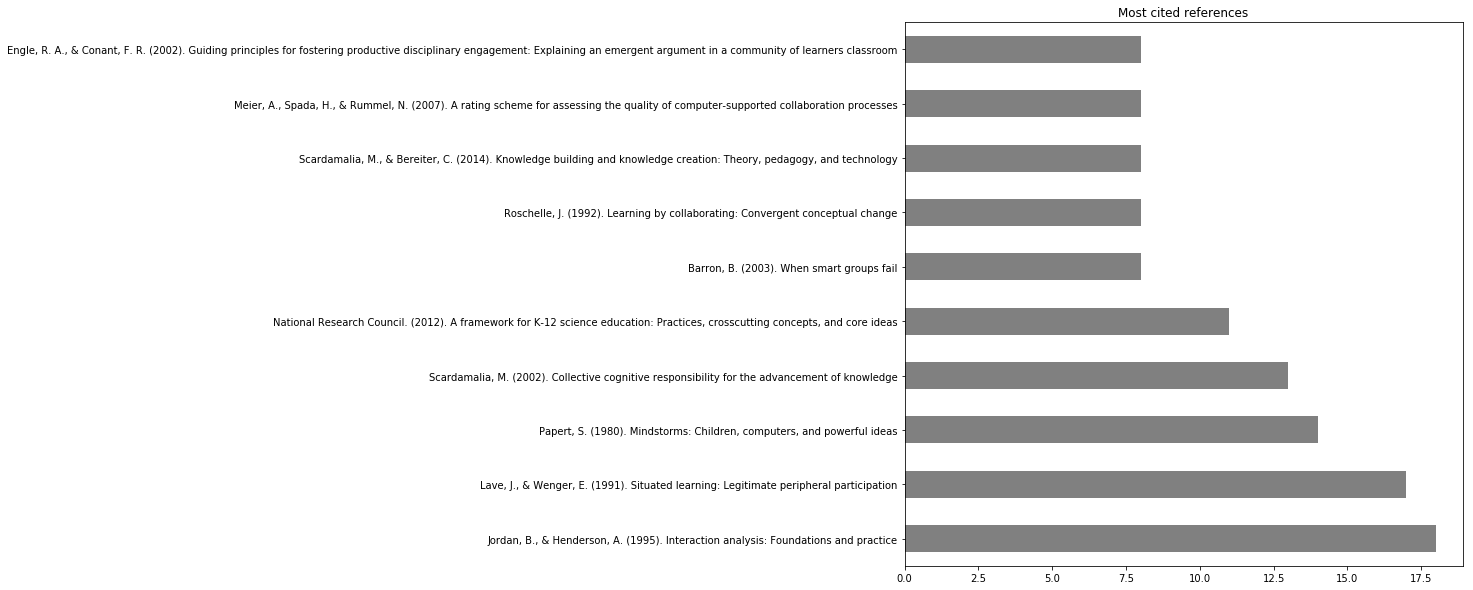

In [5]:
plt.figure(figsize=(10, 10))
plt.title('Most cited references')
references.identifier.value_counts().head(10).plot(kind='barh', color='grey')

## Variations in most cited over the years:

Then we look at the different years. A variation over the years could give insights in emerging topics, differences between ICLS and CSCL.

For instance, if we observe the number one most cited text, we see an alternating pattern - maybe those two are very important papers for the two respective conferences!

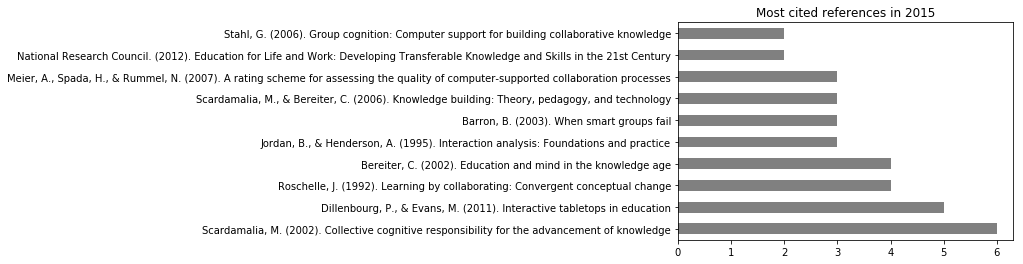

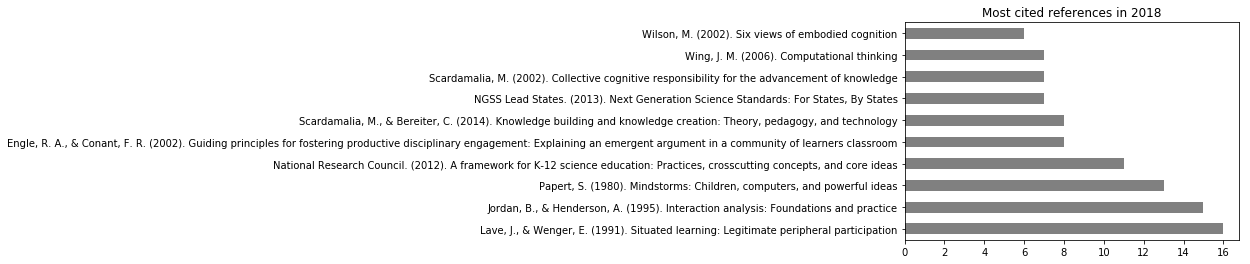

In [7]:
for year in sorted(references.pub_year.unique()):
    plt.title('Most cited references in {}'.format(year))
    references[references.pub_year == year].identifier.value_counts().head(10).plot(kind='barh', color='grey')
    plt.show()

### Looking at differences ICLS and CSCL

We decide to look at papers that are cited often and are only cited in ICLS or CSCL (and are cited at those two every year):

In [8]:
d = dict()
for year in sorted(references.pub_year.unique()):
    d[year] = set(references[references.pub_year == year].identifier.value_counts().index)

In [9]:
ICLS = d[2018].intersection(d[2016])
CSCL = d[2017].intersection(d[2015])

KeyError: 2016

In [10]:
ICLS = d[2018]
CSCL = d[2015]

In [12]:
#Even years - odd years 
ICLS - CSCL

{'Benitti, F. B. V. (2012). Exploring the educational potential of robotics in schools: A systematic review',
 'Rittle-Johnson, B., & Alibali, M.W. (1999). Conceptual and Procedural Knowledge of Mathematics: Does One Lead to the Other',
 'Strauss, A., & Corbin, J. (1998). Basics of qualitative research techniques',
 'Krajcik, J., McNeill, K. L., & Reiser, B. (2007). Learning-goals-driven design model: Developing curriculum materials that align with national standards and incorporate project-based pedagogy',
 'Kalyuga, S. (2013). Enhancing transfer by learning generalized domain knowledge structures',
 'Engeström, Y. (1999). Innovative learning in work teams: Analyzing cycles of knowledge creation in practice',
 'Ranieri, M., Manca, S., & Fini, A. (2012). Why (and how) do teachers engage in social networks',
 "Stein, R., & Brennan, S. E. (2004). Another person's eye gaze as a cue in solving programming problems",
 'Sweller, J., Ayres, P., & Kalyuga, S. (2011). Cognitive load theory',
 '

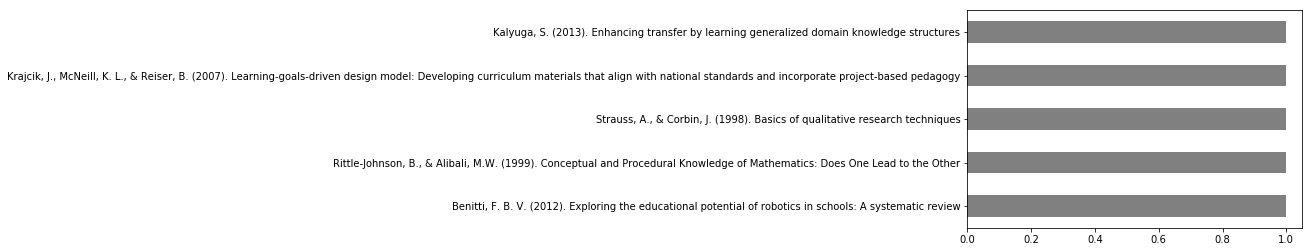

In [13]:
references.identifier.value_counts()[list(ICLS - CSCL)].head().sort_values().plot(kind='barh', color='grey')

In [14]:
CSCL - ICLS

{'Black, P., & Wiliam, D. (1998). Assessment and classroom learning',
 'Shaffer, D. W. (2007b). Learning in Design',
 'Creswell, J. W. (2007). Qualitative inquiry and research design: Choosing among five approaches',
 'Xing, W., Guo, R., Lowrance, N., & Kochtanek, T. (2014c). Decision Support Based on Time-Series Analytics: A Cluster Methodology',
 'Hawkes, M., & Romiszowski, A. (2001). Examining the reflective outcomes of asynchronous computermediated communication on inservice teacher development',
 'Bereiter, C., & Scardamalia, M. (2006). Education for the Knowledge Age: Design-Centered Models of Teaching and Instruction',
 'Ingold, T. (2014, November 7). On Human Correspondence – Huxley Memorial Lecture 2014',
 'Andersen R., Ponti M. (2014). Participatory pedagogy in an open educational course: challenges and opportunities',
 'Sharma, K., Jermann, P., Nüssli, M. A., & Dillenbourg, P. (2013). Understanding Collaborative Program Comprehension: Interlacing Gaze and Dialogues',
 'Falch

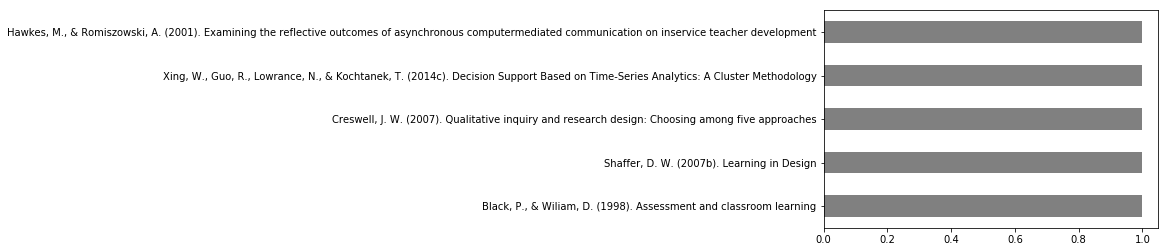

In [15]:
references.identifier.value_counts()[list(CSCL - ICLS)].head().sort_values().plot(kind='barh', color='grey')

## We look at how the publication year of  references are distributed:

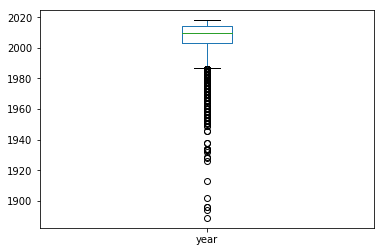

In [16]:
references.year.plot(kind='box')

We don't see much but CSCL has less early (pree 1920) outiers

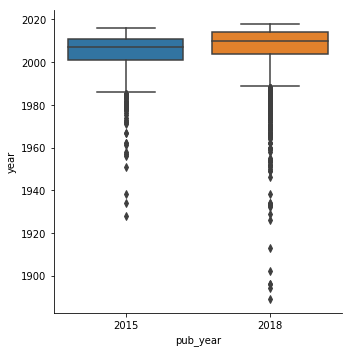

In [17]:
sns.catplot(data=references[['ref','pub_year', 'year']][~references.ref.duplicated()], x='pub_year', y='year', kind='box')

We have an interesting shift to newer sources in 2018:

In [18]:
references[['ref','pub_year', 'year']][~references.ref.duplicated()].groupby('pub_year').year.mean()

pub_year
2015    2004.50304
2018    2007.38915
Name: year, dtype: float64

In [19]:
references[['ref','pub_year', 'year']][~references.ref.duplicated()].groupby('pub_year').year.median()

pub_year
2015    2007.0
2018    2010.0
Name: year, dtype: float64

## Number of authors in and out of conference being cited

In and out of conference citations, quick calculation:

In [20]:
reference_authors = pd.read_csv('data/Reference_authors.csv', index_col=0)

In [21]:
metadata = pd.read_csv('data/Parsed_metadata.csv')

In [22]:
referenced_authors = set(reference_authors.author.tolist())
authors_in_conf = set(metadata.shortend_names.map(lambda x: x.replace('.', '')))

In [23]:
print('Number of distinct authors of papers in dataset', len(authors_in_conf))
print('Number of distinct cited authors by some author in the conference ', len(referenced_authors))
print('Number of authors that where cited by an other author in the confernce :' , len(referenced_authors.intersection(authors_in_conf)))

Number of distinct authors of papers in dataset 976
Number of distinct cited authors by some author in the conference  8687
Number of authors that where cited by an other author in the confernce : 488


Example of how one can match the string:

In [24]:
match_conference = ' JLS |Journal of the Learning Sciences|CSCL|ICLS|ijCSCL|Computer(-| |)Supported Collaborative Learning'
re.search(match_conference,'bjfejf ICLS')

<_sre.SRE_Match object; span=(7, 11), match='ICLS'>

Find references belong to conference:

In [25]:
mask_c_s = reference_authors.ref.map(lambda x: True if re.search(match_conference, x) else False)
in_conference = set(reference_authors[mask_c_s].author)

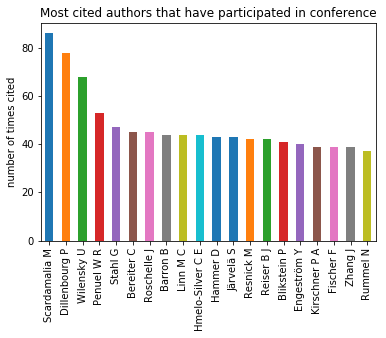

In [26]:
plt.title('Most cited authors that have participated in conference')
plt.ylabel('number of times cited')
# check that not in conference and is indeed author
is_human = reference_authors.dropna().author.map(lambda x: True if reg.search(r'\p{Lu}$',x) else False)
reference_authors[(reference_authors.author.isin(in_conference)) & is_human].author.value_counts().head(20).plot(kind = 'bar')

We limit the range of years to get people that are still "active"

In [27]:
not_in_conference = list(set(reference_authors[reference_authors.year > 2010].author) - in_conference.union(authors_in_conf))

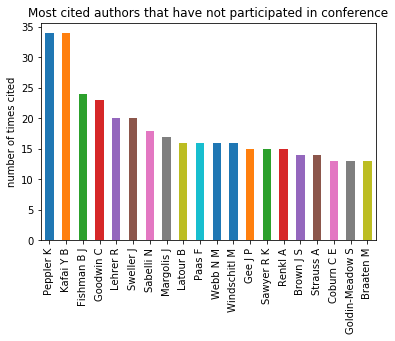

In [28]:
plt.title('Most cited authors that have not participated in conference')
plt.ylabel('number of times cited')
# check that not in conference and is indeed author
is_human = reference_authors.dropna().author.map(lambda x: True if reg.search(r'\p{Lu}$',x) else False)
reference_authors[(reference_authors.author.isin(not_in_conference)) & is_human].author.value_counts().head(20).plot(kind = 'bar')

We again split by years and conference in hopes of detecting a trend over the years or a difference between ICLS and CSCL:

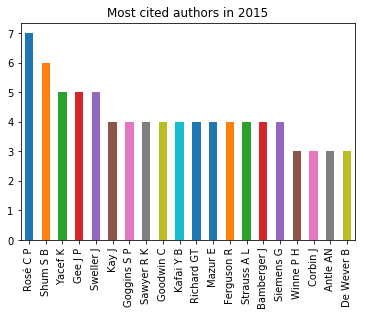

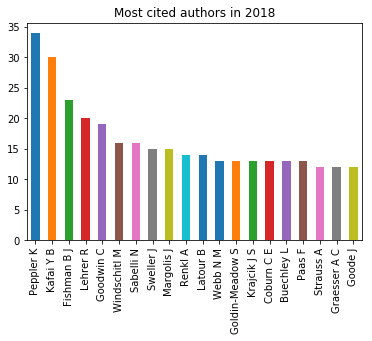

In [29]:
for year in sorted(reference_authors.pub_year.unique()):
    plt.title('Most cited authors in {}'.format(year))
    reference_authors[(reference_authors.author.isin(not_in_conference)) & is_human & (reference_authors.pub_year == year)
                 ].author.value_counts().head(20).plot(kind = 'bar')
    plt.show()

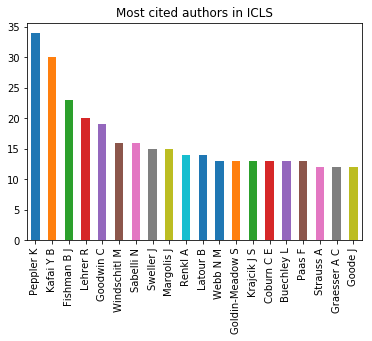

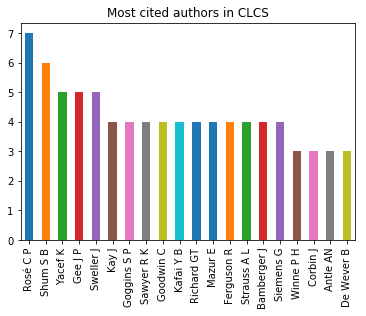

In [30]:
for i, conf in enumerate(['ICLS', 'CLCS']):
    plt.title('Most cited authors in {}'.format(conf))
    reference_authors[(reference_authors.author.isin(not_in_conference)) & is_human & (reference_authors.pub_year % 2 == i)
                 ].author.value_counts().head(20).plot(kind = 'bar')
    plt.show()

# extracting conference, journal from refrence string

Example of how we can split up the text, which is later used to extract the conference/journal if present:

In [31]:
text = references.sample().ref.item()
split_ref = r'(\.|\?) (?=[\p{Lu}][\p{L}])'
reg.split(split_ref, text)

['Chinn, C. A., Duncan, R. G., & Rinehart, R. W. (2017)',
 '.',
 'Epistemic design: Design to promote transferable epistemic growth in the PRACCIS project',
 '.',
 'In E',
 '.',
 'Manalo, Y',
 '.',
 'Uesaka & C. A',
 '.',
 'Chinn (Eds.), Promoting spontaneous use of learning and reasoning strategies: Theory, research, and practice for effective transfer',
 '.',
 'New York, NY: Routledge.']

We now define a regex that will catch up on words indicating a relation to a conference and then extract and clean the string to get a conference name:

_TODO: include symposium or not?_

In [32]:
#regex to find journals or conferences
pub = '(C|c)onference|(P|p)roceedings|(j|J)ournal|(T|t)ransactions|(s|S)ymposium'
re.search(pub, text)

In [33]:
#set to lower for better matching
match_conference = 'International Conference of (the |)Learning Sciences| JLS |Journal of the Learning Sciences|CSCL|ICLS|ijCSCL|Computer(-| |)Supported Collaborative Learning'
match_conference.lower()

'international conference of (the |)learning sciences| jls |journal of the learning sciences|cscl|icls|ijcscl|computer(-| |)supported collaborative learning'

In [34]:
import nltk
from nltk import word_tokenize
def clean_string(x):
    
    x = x.lower() # lower to ignore case
    
    x = re.sub('[\'\"\”\/\d]*', '', x) #sub out elements that might cause same string to be diff
    x = re.sub(' & ', ' and ', x) # common spelling issue
    x = re.sub(' th | nd | rd | st | volume |—|  |-', ' ', x)
    x = re.sub(' on ', ' of ', x)
    x = x.strip()
    x = ' '.join([ z for z,y in nltk.pos_tag(word_tokenize(x)) if not y in ['CD', ':','$' ]])
    return x

In [35]:
re.search(match_conference.lower(), clean_string('international journal of computer-supported collaborative learning'))

<_sre.SRE_Match object; span=(25, 66), match='computer supported collaborative learning'>

In [36]:
clean_string('international journal of computer-supported collaborative learning')

'international journal of computer supported collaborative learning'

In [37]:
mask = references.ref.map(lambda x: True if 
                          (re.search(pub, x) and not
                          re.search(match_conference.lower(), clean_string(x))) else False)

In [38]:
sources = references[mask].ref.map(lambda x: 
                            [y for y in reg.split(split_ref, x) 
                             if re.search(pub, y)
                            ][0])

In [39]:
sources.shape

(1681,)

In [40]:
sources.head().tolist()

['The Elementary School Journal, 97(1), 3.',
 'International Journal of Learning (Vol. 15).',
 'ETS Invitational Conference, New York, NY',
 'Journal of Pre-College Engineering Education Research (J-PEER), 5(1), 4.',
 'Presented at the Proceeding of the 26th Annual ACM SIGCHI Conference on Human Factors in Computing Systems (pp. 163-172).']

In [41]:
sources = sources.map(lambda x: clean_string(x))

In [42]:
def strip_garbage(s):
    r = [y.strip() for y in reg.split(r'\.|\,|\?|\;|\(|\)', s) if re.search(pub.lower(), y)]
    if len(r) > 0:
        return r[0]
    else:
        print(s)
        return None

In [43]:
sources = sources.map(lambda x: strip_garbage(x))#.map(lambda x: x[0] if len(x) > 0 else )

In [44]:
sources.sample(10).tolist()

['journal of research in science teaching',
 'british journal of educational psychology',
 'international conference of human robot interaction',
 'cambridge journal of education',
 'ieee transactions in ed',
 'journal of cognitive education and psychology',
 'journal of experimental psychology human learning and memory',
 'paper presented at the proceedings of the conference of new interfaces for musical expression',
 'british journal of educational technology',
 'journal of experimental child psychology']

Note: People like to misspell CSCL spell it in various forms..

## Most cited non  CSCL and ISCL conferences:

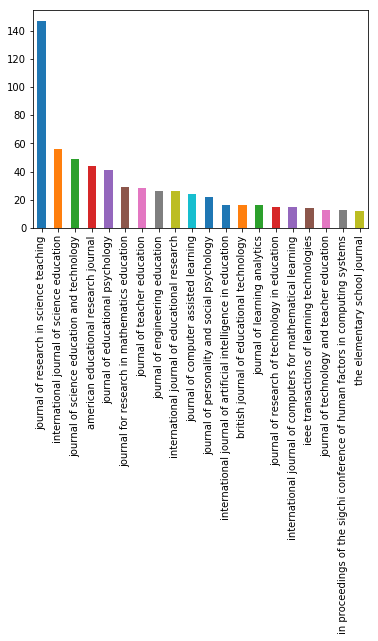

In [45]:
sources.value_counts().head(20).plot(kind='bar')

In [46]:
sources.value_counts().tail(10)

in proceedings of call                                                                         1
in proceedings of icer                                                                         1
in proceedings of the conference of innovation and technology in computer science education    1
of the annual acm icer conference                                                              1
journal of systems and software                                                                1
journal of behavioral education                                                                1
in proceedings of the fourth international workshop of computing education research            1
in proceedings of the international conference of supporting group work                        1
in proceedings of the designing interactive systems conference                                 1
international journal of arts and technology                                                   1
Name: ref, dtype: int64

We analyze how heavy the tail is to find whether we should work on parsing the tail or not:

In [47]:
conference_counts = sources.value_counts()

In [48]:
conference_counts[conference_counts >= 20].sum()

492

In [49]:
conference_counts[conference_counts < 20].sum()

1189

Conclusion: As the tail accounts for a lage number of conferences better parsing might cause a shift in the most popular conferences. Hence we look into getting more uniform names

A first idea is to look at acronyms..: https://en.wikipedia.org/wiki/List_of_computer_science_conference_acronyms

In [50]:
import urllib3
from bs4 import BeautifulSoup

In [51]:
url = 'https://en.wikipedia.org/wiki/List_of_computer_science_conference_acronyms'
http_pool = urllib3.connection_from_url(url)
r = http_pool.urlopen('GET',url)
data = r.data
soup = BeautifulSoup(data, 'html.parser')
conferences_noisy = soup.find_all('div', class_='mw-parser-output')[0].find_all('li')
abrev_df = pd.DataFrame([c.text.split(' – ') for c in conferences_noisy if reg.search('–', c.text)], columns=['abreviation', 'full_name'])

/Users/zhenchensu/anaconda2/envs/ada/lib/python3.5/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


The gives us the following list:

In [52]:
abrev_df.head()

,abreviation,full_name
0,AAAI,AAAI Conference on Artificial Intelligence
1,AAMAS,International Conference on Autonomous Agents ...
2,ABZ,International Conference on Abstract State Mac...
3,ACL,Annual Meeting of the Association for Computat...
4,ALGO,ALGO Conference


Constricting regex for easier searching on both columns:

In [53]:
conf_regex = ' | '.join(abrev_df.abreviation.map(lambda x: x.lower()).tolist())
conf_regex

'aaai | aamas | abz | acl | algo | amcis | ants | ares | asiacrypt | asp-dac | ase | aswec | atmos | cade | cav | cc | ccsc | ches | chi | ciaa | cibb | cicling | cidr | cikm | crypto | cusec | cvpr | dac | date | dcfs | disc | dlt | dsn | ecai | ecco | ecis | ecml pkdd | ecoop | ecss | esa | esop | eswc | etaps | eurocrypt | eurographics | ewsn | fase | fast | fcrc | floc | focs | forte | fossacs | fse | ftp | gd | globecom | graphicon | hicss | hipc | hopl | hot interconnects | icalp | icassp | iccad | icc | iccit | iccv | icdcs | icfp | icis | icl | iclp | icml | icpads | icse | icsoc | icsr | icter | icws | ijcai | ijcar | ijcbs | indocrypt | ipdps | ipsn | isaac | isca | iscas | ismar | iswc | ispd | isscc | iswc | kdd | lics | lrec | mm | mobicom | mobihoc | mobilehci | naacl | nips | nime | oopsla | pacis | pimrc | pkc | pkdd | pldi | plop | podc | pods | popl | post | ppopp | psb | recomb | rev | rsa | rta | sac | sac | same | seams | sefm | sensys | sigcomm | sigcse | sigdoc |

In [54]:
sources.map(lambda x: True if reg.search(conf_regex, x) else False).sum()

25

In [55]:
references.ref.map(lambda x: reg.search(conf_regex, x.lower()).group(0) if reg.search(conf_regex, x.lower()) else None).dropna().value_counts()

 chi         16
 sigcse      15
 nips         3
aaai          2
 zum          2
 post         2
 fast         2
 same         2
 www          1
 kdd          1
 wine         1
 cicling      1
 ijcai        1
 sigir        1
Name: ref, dtype: int64

In [56]:
conf_regex = ' |'.join(abrev_df.full_name.map(lambda x: x.lower()).tolist())

In [57]:
references.ref.map(lambda x: reg.search(conf_regex, x.lower()).group(0) if reg.search(conf_regex, x.lower()) else None).dropna().value_counts()

acm technical symposium on computer science education         9
acm conference on human factors in computing systems          5
annual international acm sigir conference                     1
international symposium on wearable computers                 1
international joint conference on artificial intelligence     1
aaai conference on artificial intelligence                    1
Name: ref, dtype: int64

We see that this doesn't add tooo much information, but it also indicates that people don't really seem to cute much form computer science conferences

### Other conferences

And other idea is to look at non enlish words that come up often, they might be conference names!

In [58]:
import enchant
#check if a word is english
d = enchant.Dict("en_US")

In [59]:
#some issues but works well
d.check("online")

False

In [60]:
potential_abv = [word[0].upper()+word[1:] for sentence in sources.map(lambda x: word_tokenize(x)).tolist() for word in sentence if not d.check(word)]

In [61]:
pd.Series([p for p in potential_abv if not d.check(p) and len(p) > 2 and len(p) < 6]).value_counts().head(20)

Acm      71
Ieee     35
Pre      12
Idc      11
Lak       7
Icer      6
Asee      6
Cscw      4
Intl      3
Hfsp      2
Jedm      2
Aaai      2
Http      2
Ceur      2
Criwg     1
Pnas      1
Kdd       1
Nlp       1
Aace      1
Asist     1
dtype: int64

### Looking at the question of creating more uniform names:

We use a similarity measure:

This works somewhat okay, but probably not worth the effort given that this doesn't make sigchi and  ... computer human interaction the same conference

In [62]:
import difflib
difflib.SequenceMatcher(None, 'hello', 'helo').ratio()

0.8888888888888888

In [63]:
d = {}

In [64]:
for i, row in enumerate(sources.unique()):
    for j, row_2 in enumerate(sources.unique()):
        if i > j and row != row_2:
            difference = difflib.SequenceMatcher(None, row, row_2).ratio()
            if difference > 0.9:
                if not row_2 in d.keys():
                    d[row_2] = row

In [65]:
len(d)

115

As everything is fairly regular, maybe rake can give us some titles? -> pretty much the same as we get anyway -> irregular titles are really just infequent

In [66]:
import rake
import operator

In [67]:
rake_object = rake.Rake("data/SmartStoplist.txt", 26, 10, 10)
keywords = rake_object.run(' . '.join(sources.tolist()))
keywords

[('sigchi conference of human factors in computing systems',
  54.05963911609045),
 ('journal of pre college engineering education research', 39.92179859866649),
 ('journal of research of technology in education', 39.23630532627108),
 ('conference of interaction design and children', 35.228742924557636),
 ('conference of learning analytics and knowledge', 34.65285973674065),
 ('journal for research in mathematics education', 34.18179773534069),
 ('journal of artificial intelligence in education', 34.157139647915024),
 ('journal of research in science teaching', 34.11393753343191),
 ('journal of science education and technology', 33.91120728257206),
 ('journal of personality and social psychology', 33.78292832158738),
 ('journal of computers for mathematical learning', 33.66932849794498),
 ('journal of technology and teacher education', 33.171688687326906),
 ('journal of learning and media', 27.748033724853798),
 ('journal of computer assisted learning', 27.1791087177252),
 ('journal of

## Again looking at the difference between CSCL and ICLS - outside citations:

In [68]:
references['conference'] = sources

In [69]:
references['cited_in'] = references.file.map(lambda x: int(re.search('[\d]{4}',x).group(0)))

In [70]:
references.head()

,ref,file,ref_parsed,pub_year,year,identifier,conference,cited_in
0,"Black, P., & Wiliam, D. (2009). Developing the...",2018_import_480,"Black, P., & Wiliam, D. (2009)",2018,2009.0,"Black, P., & Wiliam, D. (2009). Developing the...",NaN,2018
1,"Borko, H., Mayfield, V., Marion, S., Flexer, R...",2018_import_480,"Borko, H., Mayfield, V., Marion, S., Flexer, R...",2018,1997.0,"Borko, H., Mayfield, V., Marion, S., Flexer, R...",NaN,2018
2,"Carpenter, T. P., Fennema, E., & Franke, M. L....",2018_import_480,"Carpenter, T. P., Fennema, E., & Franke, M. L....",2018,1996.0,"Carpenter, T. P., Fennema, E., & Franke, M. L....",the elementary school journal,2018
3,"Cobb, P., Wood, T., & Yackel, E. (1993). Disco...",2018_import_480,"Cobb, P., Wood, T., & Yackel, E. (1993)",2018,1993.0,"Cobb, P., Wood, T., & Yackel, E. (1993). Disco...",NaN,2018
4,"De Corte, E. (1995). Fostering cognitive growt...",2018_import_480,"De Corte, E. (1995)",2018,1995.0,"De Corte, E. (1995). Fostering cognitive growt...",NaN,2018


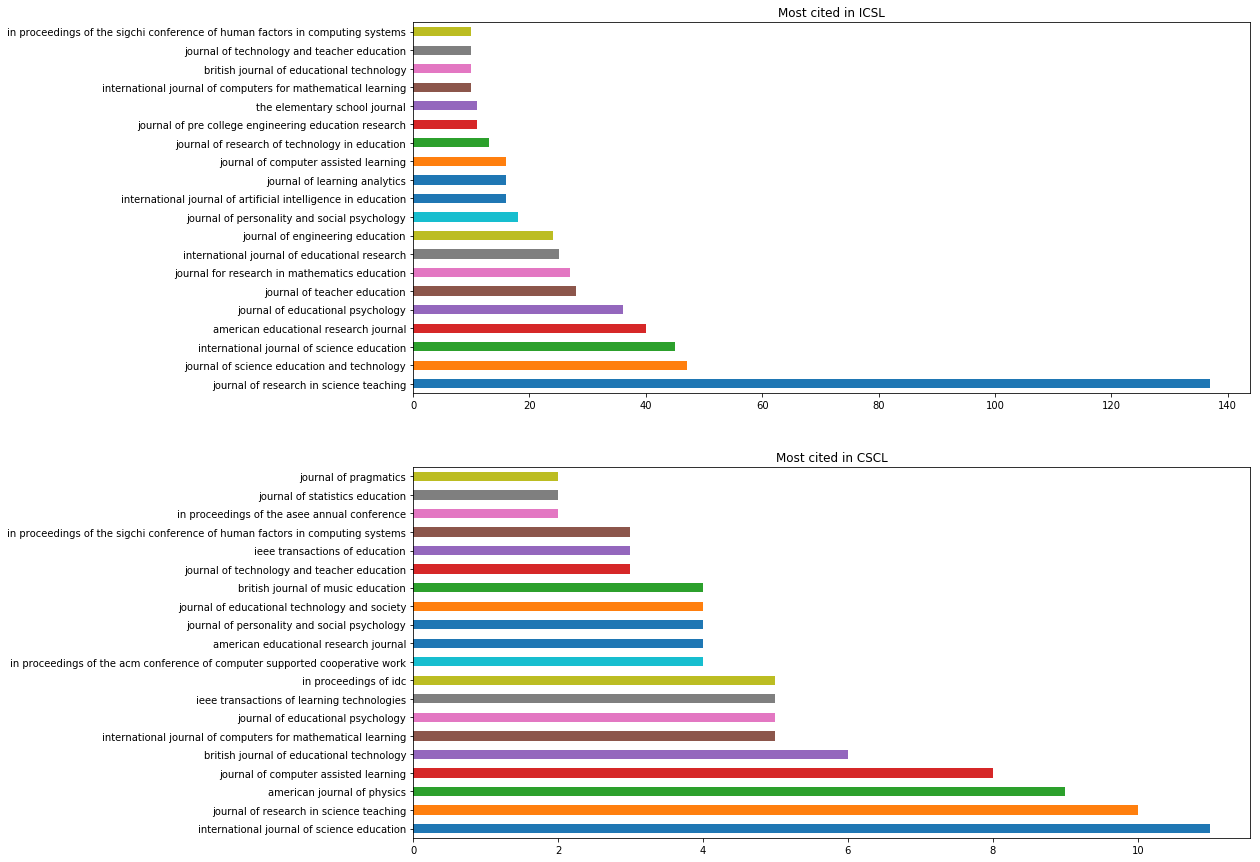

In [71]:
plt.figure(figsize=(15, 15))

plt.subplot(211)
plt.title('Most cited in ICSL')
references[references.cited_in % 2 == 0].conference.value_counts().head(20).plot(kind='barh')

plt.subplot(212)
plt.title('Most cited in CSCL')
references[references.cited_in % 2 == 1].conference.value_counts().head(20).plot(kind='barh')

Top 20 Conferences in both

In [72]:
set(references[references.cited_in % 2 == 0].conference.value_counts().head(20).index).intersection(set(references[references.cited_in % 2 == 1].conference.value_counts().head(20).index))

{'american educational research journal',
 'british journal of educational technology',
 'in proceedings of the sigchi conference of human factors in computing systems',
 'international journal of computers for mathematical learning',
 'international journal of science education',
 'journal of computer assisted learning',
 'journal of educational psychology',
 'journal of personality and social psychology',
 'journal of research in science teaching',
 'journal of technology and teacher education'}

Conferences in top twenty of ICLS and not CSCL

In [73]:
set(references[references.cited_in % 2 == 0].conference.value_counts().head(20).index) - set(references[references.cited_in % 2 == 1].conference.value_counts().head(20).index)

{'international journal of artificial intelligence in education',
 'international journal of educational research',
 'journal for research in mathematics education',
 'journal of engineering education',
 'journal of learning analytics',
 'journal of pre college engineering education research',
 'journal of research of technology in education',
 'journal of science education and technology',
 'journal of teacher education',
 'the elementary school journal'}

In [74]:
top_50 = set(references[references.cited_in % 2 == 0].conference.value_counts().head(50).index) - set(references[references.cited_in % 2 == 1].conference.value_counts().head(50).index)
top_50

{'acm transactions of computing education',
 'american journal of education',
 'australasian journal of educational technology',
 'british educational research journal',
 'in proceedings of the annual acm conference of human factors in computing systems',
 'in proceedings of the chi conference of human factors in computing systems',
 'in proceedings of the international conference of interaction design and children',
 'in proceedings of the sixth international conference of learning analytics and knowledge',
 'international journal of artificial intelligence in education',
 'international journal of child computer interaction',
 'international journal of designs for learning',
 'international journal of educational research',
 'international journal of engineering education',
 'international journal of human computer studies',
 'international journal of learning and media',
 'international journal of science and mathematics education',
 'international journal of technology and design e

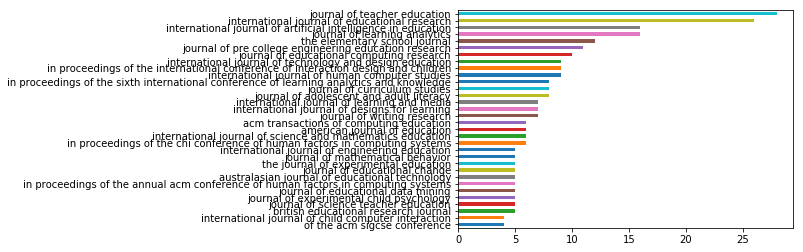

In [75]:
references[references.conference.isin(top_50)].conference.value_counts().sort_values(ascending=True).plot(kind='barh')

Conferences in top twenty of CSCL and not ICLS

In [76]:
set(references[references.cited_in % 2 == 1].conference.value_counts().head(20).index) - set(references[references.cited_in % 2 == 0].conference.value_counts().head(20).index)

{'american journal of physics',
 'british journal of music education',
 'ieee transactions of education',
 'ieee transactions of learning technologies',
 'in proceedings of idc',
 'in proceedings of the acm conference of computer supported cooperative work',
 'in proceedings of the asee annual conference',
 'journal of educational technology and society',
 'journal of pragmatics',
 'journal of statistics education'}

In [77]:
top_50 = set(references[references.cited_in % 2 == 1].conference.value_counts().head(50).index) - set(references[references.cited_in % 2 == 0].conference.value_counts().head(50).index)
top_50

{'aied workshops proceedings volume',
 'american journal of physics',
 'british journal of music education',
 'ieee international conference of',
 'ieee transactions of education',
 'ieee transactions on',
 'in annual conference of psychology of programming interest group',
 'in proceedings of chi',
 'in proceedings of idc',
 'in proceedings of the acm conference of computer supported cooperative work',
 'in proceedings of the asee annual conference',
 'in proceedings of the asee annual conference and exposition',
 'in proceedings of the conference of human factors in computing systems',
 'in symposium of new challenges to research of learning',
 'in world conference of educational multimedia',
 'international journal of science and matter',
 'international journal of science mathematics education',
 'journal of artificial societies and social simulation',
 'journal of asynchronous learning networks',
 'journal of computer mediated communication',
 'journal of computers in mathematics 

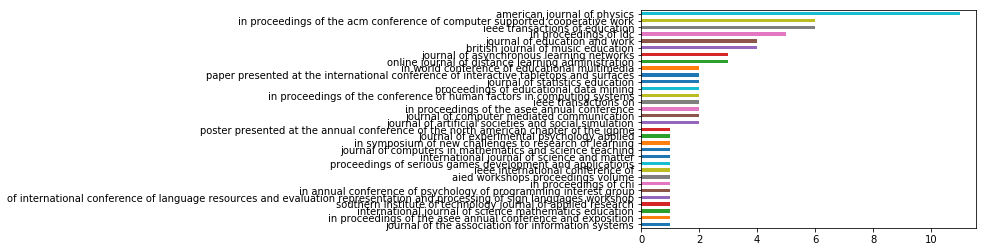

In [78]:
references[references.conference.isin(top_50)].conference.value_counts().sort_values(ascending=True).plot(kind='barh')